<a href="https://colab.research.google.com/github/bhavangond/TensorFlow/blob/main/05_transfer_learning_in_tensorflow_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine Tuning

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py


--2025-08-20 05:38:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-08-20 05:38:16 (90.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Import helper functions
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [3]:
# get the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2025-08-20 05:38:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 172.253.118.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  21.2MB/s    in 8.6s    

2025-08-20 05:38:39 (18.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

In [5]:
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [6]:
import tensorflow as tf
IMG_SIZE=(224,224)

train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=32)
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[  2.           2.           0.        ]
   [  1.0714283    1.0714283    0.        ]
   [  1.           1.           0.        ]
   ...
   [ 18.785736     9.785736     2.785736  ]
   [ 18.571415     9.571416     2.5714154 ]
   [ 16.642857     7.642857     0.6428572 ]]

  [[  2.           2.           0.        ]
   [  1.0714283    1.0714283    0.        ]
   [  1.           1.           0.        ]
   ...
   [ 18.785736     9.785736     2.785736  ]
   [ 20.85713     11.85713      4.85713   ]
   [ 19.571394    10.571394     3.571394  ]]

  [[  2.           2.           0.        ]
   [  1.0714283    1.0714283    0.        ]
   [  1.           1.           0.        ]
   ...
   [ 20.000023    10.785736     1.7857361 ]
   [ 20.928558    11.7142725    2.7142725 ]
   [ 19.           9.785714     0.78571415]]

  ...

  [[167.28572    159.28572    156.28572   ]
   [168.19896    163.19896    159.19896   ]
   [165.78569    163.21426    158.21426   ]
   ...
   [ 71.30608     37.306

## Bulding model using Keras Functional API

In [8]:
# 1. Create base model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model
base_model.trainable=False

# 3. Create inputs
inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# 4. Normalizing (not required for efficient net)
#x=tf.keras.layers.experimentl.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs
x=base_model(inputs)
print(f"Shape after passing inputs:  {x.shape}")

x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"shape after GlobalAveragePooling2D : {x.shape}")

# 7.create output layer
outputs=tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

# 8. Combine input and output
model_0=tf.keras.Model(inputs,outputs)

# 9. Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# 10. Fit the model
history_10_percent=model_0.fit(train_data_10_percent,
                               epochs=5,
                               steps_per_epoch=len(train_data_10_percent),
                               validation_data=test_data,
                               validation_steps=int(0.25*len(test_data)),
                               )



16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape after passing inputs:  (None, 7, 7, 1280)
shape after GlobalAveragePooling2D : (None, 1280)
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 995ms/step - accuracy: 0.2445 - loss: 2.1668 - val_accuracy: 0.7039 - val_loss: 1.3019
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7251 - loss: 1.2308 - val_accuracy: 0.8257 - val_loss: 0.8502
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.8341 - loss: 0.8124 - val_accuracy: 0.8470 - val_loss: 0.6616
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.8686 - loss: 0.6399 - val_accuracy: 0.8651 - val_loss: 0.5773
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.8858 - loss: 0.5565 - val_accuracy: 0.8651 - val_loss: 0.5238


In [9]:
# Evaluate on full test dataset
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.8617 - loss: 0.5394


[0.5652364492416382, 0.8596000075340271]

In [10]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_layer
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [11]:
base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          7 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, None,      │          0 │ normalization[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, None,      │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ stem_conv_pad[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, None,      │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, None,      │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, None,      │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, None,      │          0 │ block1a_activati… │
│ (Multiply)          │ None, 32)         │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [12]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

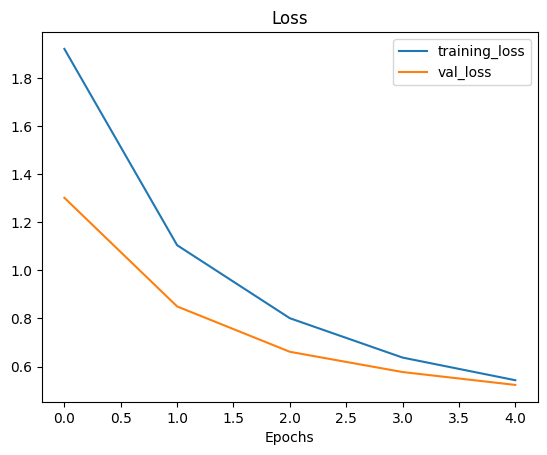

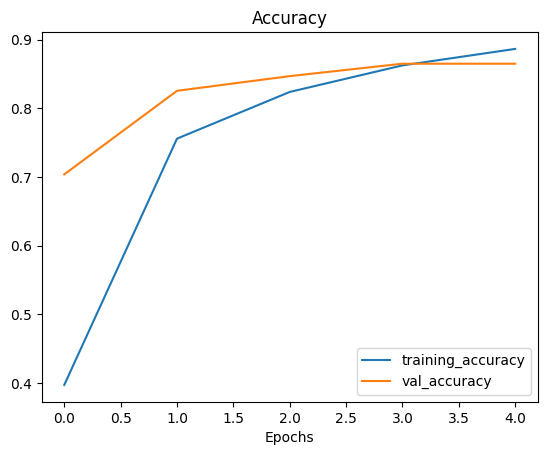

In [13]:
plot_loss_curves(history_10_percent)

## Getting featured vector from trained mode

In [14]:
# GlobalAveragePooling2D
input_shape=(1,4,4,3)

tf.random.set_seed(42)

input_tensor=tf.random.normal(input_shape)

print(f"Random input tensor :\n {input_tensor}\n")

# pass the tensor through GlobalAveragePooling2D
global_average_pooled_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(f"2D global average pooled random tensor :\n{global_average_pooled_tensor} \n")

# shape
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of Global Average Pooled 2D tensor:{global_average_pooled_tensor.shape}")

Random input tensor :
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor :
[[-0.09368646 -0.45840448 -0.2885598 ]] 

Shape of input tensor: (1, 4, 4, 3)
Shape of Global Average Pooled 2D tensor:(1, 3)


In [15]:
# replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## Transfer learning experiment

In [23]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2025-08-20 04:41:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.207, 108.177.119.207, 108.177.127.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.2’

10_food_classes_1_p 100%[===================>] 127.42M  37.2MB/s    in 3.8s    

2025-08-20 04:41:35 (33.7 MB/s) - ‘10_food_classes_1_percent.zip.2’ saved [133612354/133612354]



In [24]:
unzip_data("10_food_classes_1_percent.zip")

In [25]:
train_dir_1_percent="10_food_classes_1_percent/train"
test_dir="10_food_classes_1_percent/test"

In [26]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There a

In [27]:
# data loaders
import tensorflow as tf
IMG_SIZE=(224,224)

train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                         label_mode="categorical",
                                                                         image_size=IMG_SIZE,
                                                                         batch_size=32)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                         label_mode="categorical",
                                                                         image_size=IMG_SIZE,
                                                                         batch_size=32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation=keras.Sequential([
     layers.Resizing(224,224) ,
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
   # layers.RandomHeight(0.2),
    #layers.RandomWidth(0.2),

],name="data_augmentation")

### Visulaize data augmentation

((512, 512, 3), TensorShape([1, 224, 224, 3]))

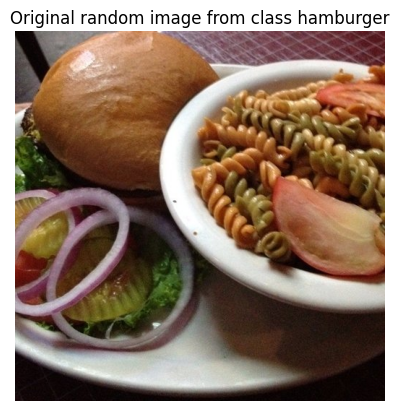

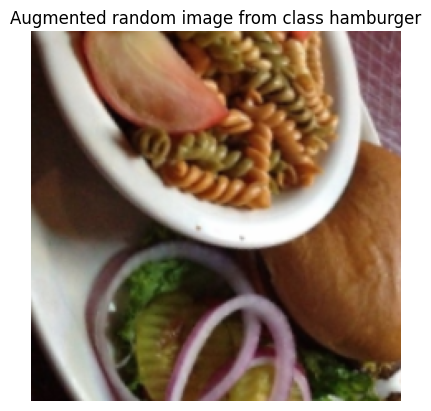

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class=random.choice(train_data_1_percent.class_names)
target_dir="10_food_classes_1_percent/train/"+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+random_image

img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False)


# Augmented image
augmented_img=data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class {target_class}")
plt.axis(False)
img.shape,augmented_img.shape



## Model 1: feature extraction transfer learning

In [30]:
# Input layer must match dataset (224x224)
inputs = layers.Input(shape=(224,224,3), name="input_layer")

# Data augmentation (no need to resize again!)
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
], name="data_augmentation")

# Base model with matching input shape
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(224,224,3),
    weights="imagenet"
)
base_model.trainable = False

# Connect pipeline
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = keras.Model(inputs, outputs)


model_1.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


history_1_percent=model_1.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data,
                              validation_steps=int(0.25*len(test_data)))



Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.1671 - loss: 2.2942 - val_accuracy: 0.2204 - val_loss: 2.1972
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.3426 - loss: 2.0613 - val_accuracy: 0.3125 - val_loss: 2.0524
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 903ms/step - accuracy: 0.4818 - loss: 1.8412 - val_accuracy: 0.3783 - val_loss: 1.9490
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 701ms/step - accuracy: 0.5546 - loss: 1.7304 - val_accuracy: 0.4457 - val_loss: 1.8568
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6040 - loss: 1.6357 - val_accuracy: 0.5082 - val_loss: 1.7573


In [31]:
model_1.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

In [32]:
# Evaluate on full test data
resuts_1_percent_data_aug=model_1.evaluate(test_data)

resuts_1_percent_data_aug

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.5126 - loss: 1.7563


[1.7622277736663818, 0.5108000040054321]

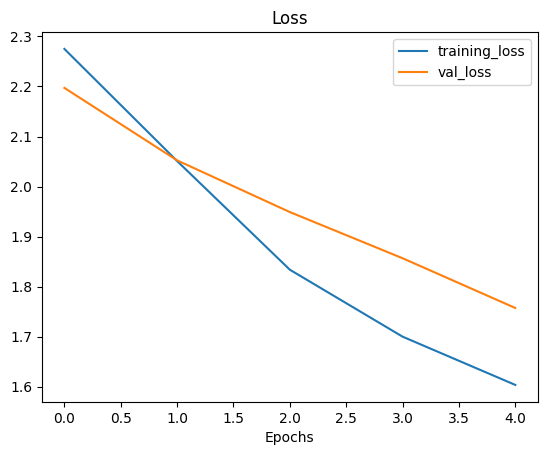

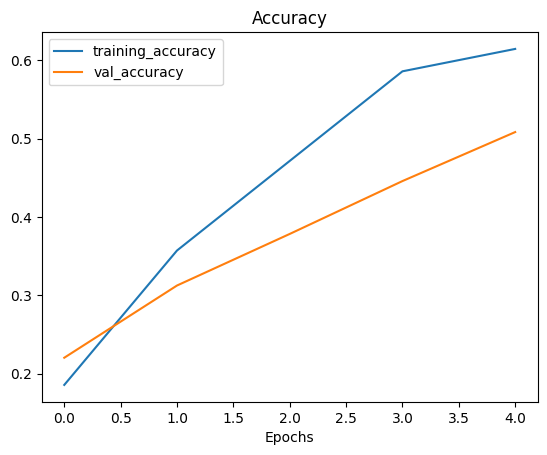

In [33]:
# loss curves
plot_loss_curves(history_1_percent)

## Model 2 with 10 pecent of data

In [4]:
train_dir_10_percent="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [5]:
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode="categorical",
                                                              image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
# Create model 2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation=keras.Sequential([
     #layers.Resizing(224,224) ,
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
   # layers.RandomHeight(0.2),
    #layers.RandomWidth(0.2),

],name="data_augmentation")


# Input layer must match dataset (224x224)
inputs = layers.Input(shape=(224,224,3), name="input_layer")

# Base model with matching input shape
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(224,224,3),
    weights="imagenet"
)
base_model.trainable = False

# Connect pipeline
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = keras.Model(inputs, outputs)


model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)




16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Creating model checkpoint callbacks

In [7]:
# Set checkpoint path
checkpoint_path="ten_percent_model_checkpoints_weights/.weights.h5"

# Create ModelCheckpoint callback
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=False,
                                                       save_freq="epoch",
                                                       verbose=1)

### Fit model 2

In [8]:
intial_epochs=5

history_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                        epochs=intial_epochs,
                                        validation_data=test_data,
                                        validation_steps=int(0.25*len(test_data)),
                                        callbacks=[checkpoint_callback])

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2947 - loss: 2.0923
Epoch 1: saving model to ten_percent_model_checkpoints_weights/.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 323ms/step - accuracy: 0.2990 - loss: 2.0850 - val_accuracy: 0.6645 - val_loss: 1.4033
Epoch 2/5
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6819 - loss: 1.3526
Epoch 2: saving model to ten_percent_model_checkpoints_weights/.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - accuracy: 0.6835 - loss: 1.3458 - val_accuracy: 0.7993 - val_loss: 0.9672
Epoch 3/5
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7733 - loss: 1.0400
Epoch 3: saving model to ten_percent_model_checkpoints_weights/.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.7728 - loss: 1.0362 - val_accuracy: 0.8191 - val_loss: 0.8044
Epoch 4/5
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7715 - loss: 0.9049
Epoch 4: saving model to ten_percent_model_checkpoints_weights/.weights.h5
24/24 ━━━━━━

In [10]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.8385 - loss: 0.6315


[0.6277955770492554, 0.8320000171661377]

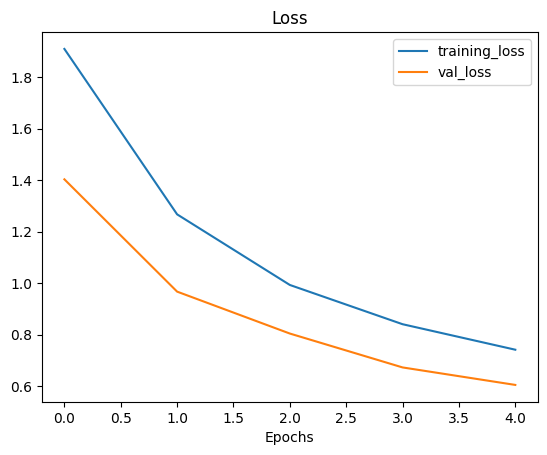

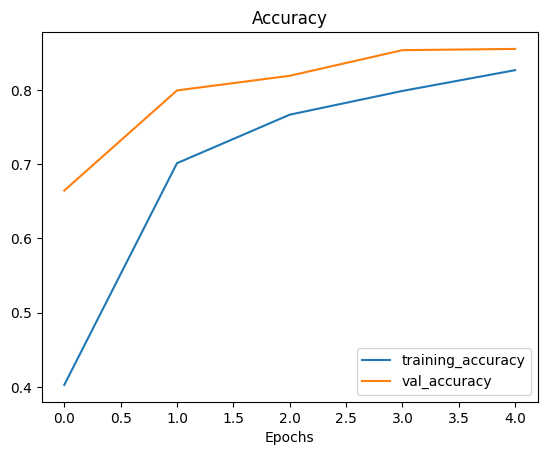

In [11]:
plot_loss_curves(history_10_percent_data_aug)

In [12]:
model_2.load_weights(checkpoint_path)

In [13]:
loaded_weights_model_results=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.8375 - loss: 0.6400


In [14]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=efficientnetb0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [15]:
for layer in model_2.layers:
  print(layer,layer.trainable)

<InputLayer name=input_layer, built=True> True
<Sequential name=data_augmentation, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=global_average_pooling_layer, built=True> True
<Dense name=output_layer, built=True> True


In [17]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [23]:
 # Setting base model trainable=true
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

# Recompile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])






In [24]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [25]:
fine_tune_epochs=intial_epochs+5


history_fine_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                             epochs=fine_tune_epochs,
                                             validation_data=test_data,
                                             validation_steps=int(0.25 * len(test_data)),
                                             initial_epoch=history_10_percent_data_aug.epoch[-1])

Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 270ms/step - accuracy: 0.7736 - loss: 0.8083 - val_accuracy: 0.8503 - val_loss: 0.5926
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.8307 - loss: 0.7048 - val_accuracy: 0.8635 - val_loss: 0.5231
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.8281 - loss: 0.6304 - val_accuracy: 0.8520 - val_loss: 0.4965
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.8406 - loss: 0.6026 - val_accuracy: 0.8717 - val_loss: 0.4429
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 362ms/step - accuracy: 0.8693 - loss: 0.5257 - val_accuracy: 0.8553 - val_loss: 0.4658
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 361ms/step - accuracy: 0.8864 - loss: 0.4575 - val_accuracy: 0.8668 - val_loss: 0.4322


In [26]:
# Evaluate fine tune model
results_fine_tune_10_percent=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.8672 - loss: 0.4389


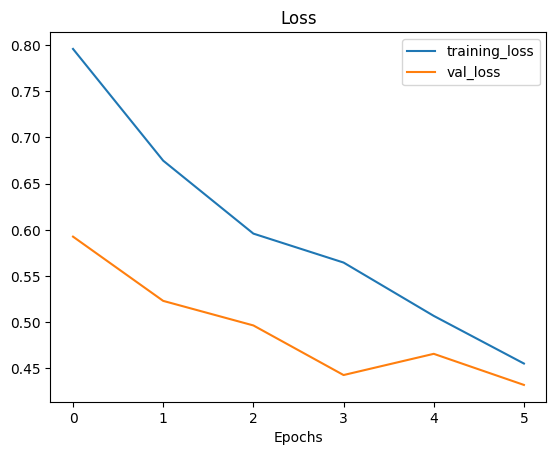

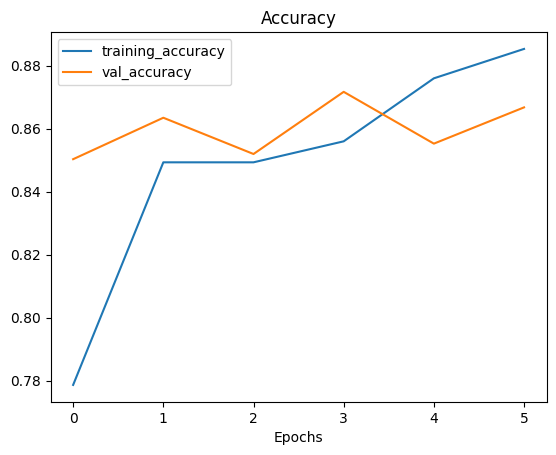

In [27]:
# Check out the loss curves
plot_loss_curves(history_fine_10_percent_data_aug)

In [32]:
import matplotlib.pyplot as plt

def compare_history(original_history,new_history,initial_epochs=5):

  acc=original_history.history["accuracy"]
  loss=original_history.history["loss"]

  val_acc=original_history.history["val_accuracy"]
  val_loss=original_history.history["val_loss"]

  # Combine original history with new history
  total_acc=acc+new_history.history["accuracy"]
  total_loss=loss+new_history.history["loss"]

  total_val_acc=val_acc+new_history.history["val_accuracy"]
  total_val_loss=val_loss+new_history.history["val_loss"]

  # Make plot accuarcy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label="Training Accuracy")
  plt.plot(total_val_acc,label="Val accuracy")
  plt.plot([initial_epochs-1,intial_epochs-1],plt.ylim(),label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("training and validatiom Accuracy")

  #make plot loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label="Training loss")
  plt.plot(total_val_loss,label="Val loss")
  plt.plot([initial_epochs-1,intial_epochs-1],plt.ylim(),label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("training and validatiom Accuracy")



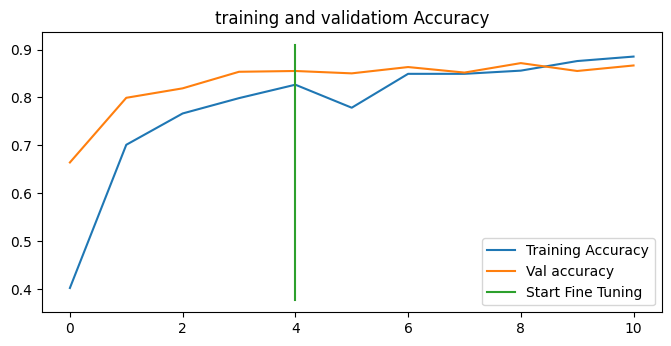

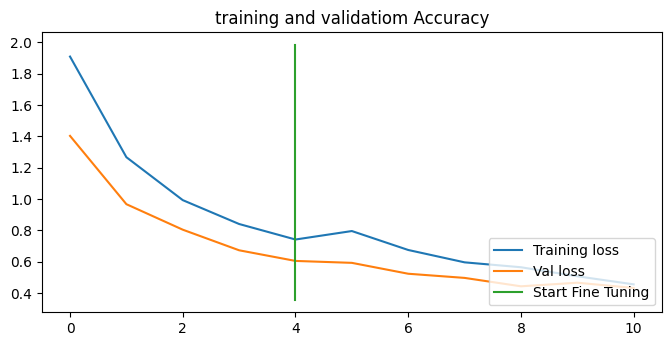

In [33]:
compare_history(history_10_percent_data_aug,history_fine_10_percent_data_aug,initial_epochs=5)